<a href="https://colab.research.google.com/github/7yl4r/DwC-SDM/blob/main/seagrass_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data collection


In [18]:
# =======================================================================
# TAXA SELECTION (uncomment one)
# =======================================================================
# === seagrass
seagrass_names = [
    "Halodule wrightii",
    "Halophila engelmannii",
    "Thalassia testudinum",
    "Halophila decipiens",
    "Syringodium filiforme"
]
obis_taxa_ids = [143769, 143770, 143751, 143768, 234030]
# =======================================================================
# =======================================================================
# AREA OF INTEREST SELECTION (uncomment one)
# =======================================================================
# # florida_keys_bbox
# AoI_BBOX = [-82, 24, -80, 25]

# contiguous US
AoI_BBOX = [-135, 10, -59, 54]
# =======================================================================
# =======================================================================
# DATASET SETUP
# =======================================================================

ENV_DATA_RESOLUTION = 0.02  # degrees
# =======================================================================
# =======================================================================
# OTHER SETUP
# =======================================================================
# NOTE: Before running you must create a folder in your google drive
#       matching the directory name here `GSoC_SDM_Project`.
PROJECT_DIR = '/content/drive/MyDrive/GSoC_SDM_Project'
# =======================================================================


In [19]:
import os

# set up gdrive for WOA tif usage
from google.colab import drive
drive.mount('/content/drive')

import os
project_dir = '/content/drive/MyDrive/GSoC_SDM_Project'
if not os.path.exists(project_dir):
    os.makedirs(project_dir)

if "DwC-SDM" not in os.getcwd():

    # Clone the GitHub repo
    !git clone https://github.com/7yl4r/DwC-SDM.git

    # Change directory
    %cd DwC-SDM
else:
    !git pull

!pip install pyobis pygbif pandas folium xarray netCDF4 rasterio



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Already up to date.


In [20]:
import pandas as pd

# import functions from repo
import woa_sdm
# forces reload for modules under development
import importlib
importlib.reload(woa_sdm)


gbif_df = woa_sdm.get_gbif_data(seagrass_names, area_bbox=AoI_BBOX)
# print(f'gbif: {gbif_df.head()}')

obis_df = woa_sdm.get_obis_occurrences_by_taxaids(obis_taxa_ids, area_bbox=AoI_BBOX)
# print(f'obis: {obis_df.head()}')

combined_df = pd.concat([obis_df, gbif_df], ignore_index=True)

# Select only columns needed and safe to hash
combined_df = combined_df[['decimalLongitude', 'decimalLatitude', 'eventDate']]

combined_df = combined_df.drop_duplicates().dropna(subset=['decimalLongitude', 'decimalLatitude', 'eventDate']).reset_index(drop=True)
print("Combined OBIS + GBIF data:", combined_df.shape)
# combined_df.head()

# === data cleaning

combined_df = combined_df.drop_duplicates()

combined_df = combined_df.dropna(subset=['decimalLongitude', 'decimalLatitude', 'eventDate'])

combined_df['eventDate'] = pd.to_datetime(combined_df['eventDate'], errors='coerce')
combined_df = combined_df.dropna(subset=['eventDate'])
combined_df['year'] = combined_df['eventDate'].dt.year

combined_df = combined_df[combined_df['year'] >= 2000]

combined_df = combined_df.reset_index(drop=True)

print(combined_df.shape)



fetching taxa "Halodule wrightii"...
300 occurrences found.
fetching taxa "Halophila engelmannii"...
300 occurrences found.
fetching taxa "Thalassia testudinum"...
300 occurrences found.
fetching taxa "Halophila decipiens"...
300 occurrences found.
fetching taxa "Syringodium filiforme"...
300 occurrences found.
fetching taxa aphiaID #143769...
0 occurrences found.
fetching taxa aphiaID #143770...
9767 occurrences found.
fetching taxa aphiaID #143751...
10000 occurrences found.
fetching taxa aphiaID #143768...
6807 occurrences found.
fetching taxa aphiaID #234030...
356 occurrences found.
Combined OBIS + GBIF data: (9957, 3)
(646, 4)


In [21]:
combined_df.head()


,decimalLongitude,decimalLatitude,eventDate,year
0,-128.247360,51.809070,2018-08-20,2018
1,-128.119841,51.644749,2018-05-22,2018
2,-128.412210,52.061450,2017-08-29,2017
3,-128.119841,51.644749,2019-02-12,2019
4,-128.246860,51.808660,2017-08-28,2017


# Bringing Environmental data

In [22]:
# import functions from repo
import woa_sdm

# forces reloades in modules under development
import importlib
importlib.reload(woa_sdm)


# TODO: use here
df_with_env = combined_df
df_with_env = woa_sdm.add_environmental_data(df_with_env, f'{PROJECT_DIR}/woa23_all_i00_01.nc_i_mn.tif', 'i')
df_with_env = woa_sdm.add_environmental_data(df_with_env, f'{PROJECT_DIR}/woa23_all_i00_01.nc_i_sd.tif', 'i_sd')
df_with_env = woa_sdm.add_environmental_data(df_with_env, f'{PROJECT_DIR}/woa23_all_n00_01.nc_n_mn.tif', 'n')
df_with_env = woa_sdm.add_environmental_data(df_with_env, f'{PROJECT_DIR}/woa23_all_n00_01.nc_n_sd.tif', 'n_sd')
df_with_env = woa_sdm.add_environmental_data(df_with_env, f'{PROJECT_DIR}/woa23_all_o00_01_o_sd.tif', 'o')
df_with_env = woa_sdm.add_environmental_data(df_with_env, f'{PROJECT_DIR}/woa23_all_o00_01_o_mn.tif', 'o_sd')
df_with_env = woa_sdm.add_environmental_data(df_with_env, f'{PROJECT_DIR}/woa23_all_O00_01.nc_A_mn.tif', 'O')
df_with_env = woa_sdm.add_environmental_data(df_with_env, f'{PROJECT_DIR}/woa23_all_O00_01.nc_A_sd.tif', 'O_sd')
df_with_env = woa_sdm.add_environmental_data(df_with_env, f'{PROJECT_DIR}/woa23_all_p00_01.nc_p_mn.tif', 'p')
df_with_env = woa_sdm.add_environmental_data(df_with_env, f'{PROJECT_DIR}/woa23_all_p00_01.nc_p_sd.tif', 'p_sd')
df_with_env = woa_sdm.add_environmental_data(df_with_env, f'{PROJECT_DIR}/woa23_decav_t00_04_t_mn.tif', 't')
df_with_env = woa_sdm.add_environmental_data(df_with_env, f'{PROJECT_DIR}/woa23_decav_t00_04_t_sd.tif', 't_sd')


Added i: 327/646 valid values
Added i_sd: 322/646 valid values
Added n: 339/646 valid values
Added n_sd: 339/646 valid values
Added o: 381/646 valid values
Added o_sd: 381/646 valid values
Added O: 381/646 valid values
Added O_sd: 381/646 valid values
Added p: 345/646 valid values
Added p_sd: 345/646 valid values
Added t: 110/646 valid values
Added t_sd: 110/646 valid values


In [23]:
# import xarray as xr
# import pandas as pd
# import numpy as np
# from tqdm import tqdm

# ==== add salinity
# salinity_file = f'{project_dir}/cmems_salinity_44d2_bc4b_70b2_U1749495233099.nc'
# ds = xr.open_dataset(salinity_file)

# sal_lats = ds['latitude'].values
# sal_lons = ds['longitude'].values
# sal_times = pd.to_datetime(ds['time'].values)

# def get_nearest_salinity_spatial(row, ds, lons, lats, varname='so'):
#     lon_idx = np.abs(lons - row['lon']).argmin()
#     lat_idx = np.abs(lats - row['lat']).argmin()
#     try:
#         value = ds[varname].isel(time=0, latitude=lat_idx, longitude=lon_idx).values.item()

#         if hasattr(value, 'mask') and value.mask:
#             return np.nan
#         if np.isnan(value):
#             return np.nan
#         return value
#     except Exception as e:
#         return np.nan

# tqdm.pandas()
# combined_df['salinity'] = combined_df.progress_apply(
#     lambda row: get_nearest_salinity_spatial(row, ds, sal_lons, sal_lats, varname='so'),
#     axis=1
# )


# print("\n")
# print(combined_df[['lon', 'lat', 'time', 'salinity']].head())
# print(combined_df['salinity'].describe())

# === add temperature
# temp_file = f'{project_dir}/woa23_decav_t00_04.nc'
# ds_temp = xr.open_dataset(temp_file, decode_times=False)

# print(ds_temp)
# print(ds_temp.data_vars)
# temp_var = 't_an'  # annual mean temperature
# lat_name = 'lat'
# lon_name = 'lon'

# temp_lats = ds_temp[lat_name].values
# temp_lons = ds_temp[lon_name].values


# ds_temp_surf = ds_temp[temp_var].isel(time=0, depth=0)
# def get_nearest_temp_spatial(row, temp_grid, lons, lats):
#     lon_idx = np.abs(lons - row['lon']).argmin()
#     lat_idx = np.abs(lats - row['lat']).argmin()
#     try:
#         value = temp_grid[lat_idx, lon_idx].values.item()
#         if hasattr(value, 'mask') and value.mask:
#             return np.nan
#         if np.isnan(value):
#             return np.nan
#         return value
#     except Exception:
#         return np.nan
# combined_df['temperature'] = combined_df.progress_apply(
#     lambda row: get_nearest_temp_spatial(row, ds_temp_surf, temp_lons, temp_lats),
#     axis=1
# )
# print("\n")

# print(combined_df[['lon', 'lat', 'time', 'salinity', 'temperature']].head())
# print(combined_df['temperature'].describe())

combined_df = df_with_env
combined_df.head()


,decimalLongitude,decimalLatitude,eventDate,year,i,i_sd,n,n_sd,o,o_sd,O,O_sd,p,p_sd,t,t_sd
0,-128.247360,51.809070,2018-08-20,2018,18.303965,10.83514,6.126667,5.315142,29.952686,286.462006,-5.104849,28.560833,0.823439,0.426859,NaN,NaN
1,-128.119841,51.644749,2018-05-22,2018,18.303965,10.83514,6.126667,5.315142,29.952686,286.462006,-5.104849,28.560833,0.823439,0.426859,NaN,NaN
2,-128.412210,52.061450,2017-08-29,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-128.119841,51.644749,2019-02-12,2019,18.303965,10.83514,6.126667,5.315142,29.952686,286.462006,-5.104849,28.560833,0.823439,0.426859,NaN,NaN
4,-128.246860,51.808660,2017-08-28,2017,18.303965,10.83514,6.126667,5.315142,29.952686,286.462006,-5.104849,28.560833,0.823439,0.426859,NaN,NaN


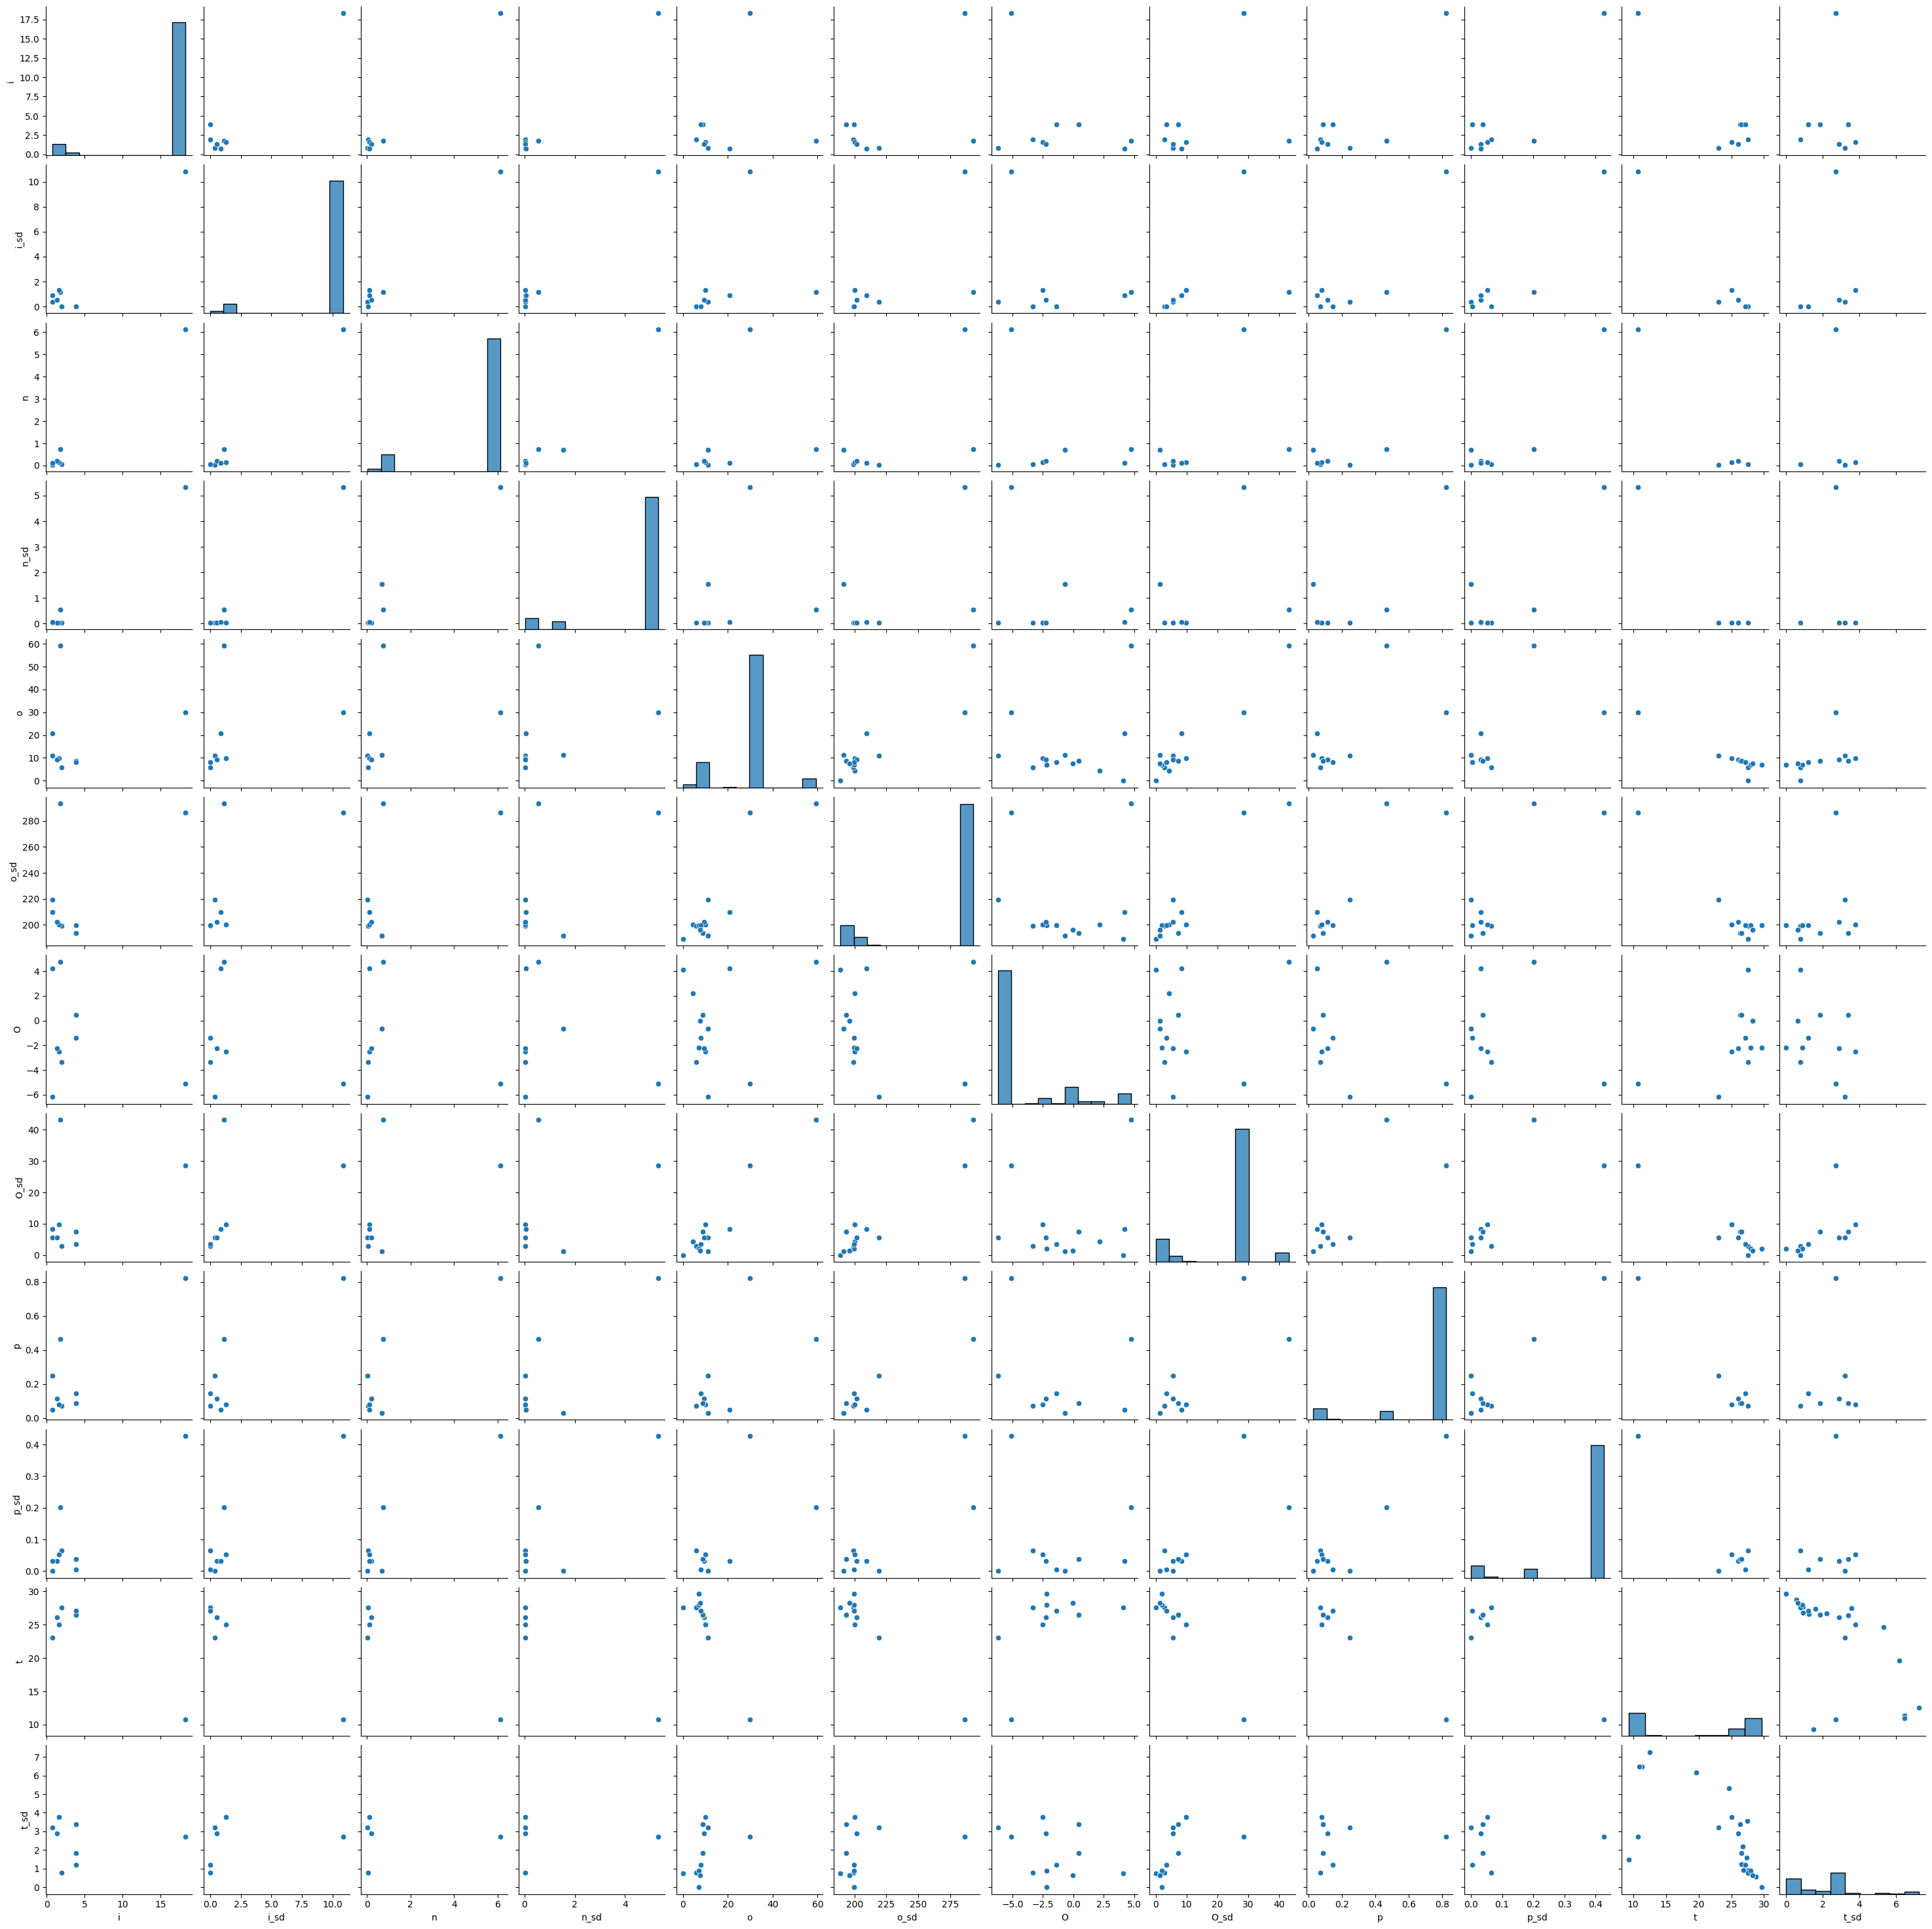

In [24]:
import seaborn as sns
df = combined_df.drop(columns=['decimalLongitude', 'decimalLatitude', 'eventDate', 'year'])

import matplotlib.pyplot as plt

# Basic correlogram
sns.pairplot(df)
plt.show()


Temporal Trends

/tmp/ipython-input-383050540.py:17: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pct = df.set_index('eventDate').pct_change() * 100


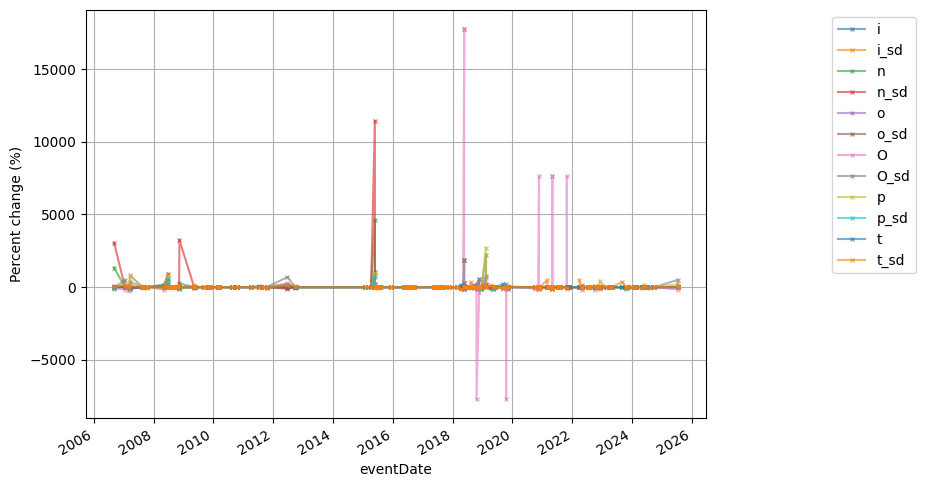

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Base frame
df = combined_df.drop(columns=['decimalLongitude', 'decimalLatitude', 'year']).copy()

# 1) Ensure datetime
df['eventDate'] = pd.to_datetime(df['eventDate'], errors='coerce', utc=True)

# 2) Sort by time
df = df.sort_values('eventDate')

# 3) (Optional) collapse duplicates per timestamp
# df = df.groupby('eventDate', as_index=False).mean()

# 4) Compute percent change column-wise on a DatetimeIndex
df_pct = df.set_index('eventDate').pct_change() * 100

# 5) Plot (x is the index now)
ax = df_pct.plot(
    grid=True,
    marker='x',
    markersize=3,
    alpha=0.6,
    legend=True,
    figsize=(8, 6)
)

ax.set_ylabel("Percent change (%)")
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.show()


 Correlation Coefficient

# SDM One Class SVM

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [27]:

exclude = ['decimalLongitude', 'decimalLatitude', 'eventDate', 'year']
features = [c for c in df.columns if c not in exclude]
# features = ['salinity', 'temperature']

df_ml = combined_df.dropna(subset=features)

X = df_ml[features].values

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma=0.5)
model.fit(X_train_scaled)
df_ml['score'] = model.decision_function(scaler.transform(X))
df_ml['anomaly'] = model.predict(scaler.transform(X))  # +1 normal, -1 outlier

features.append('score')
features.append('anomaly')

print(df_ml[features].head())
print(df_ml['anomaly'].value_counts())


            i      i_sd         n      n_sd          o        o_sd         O  \
18  18.303965  10.83514  6.126667  5.315142  29.952686  286.462006 -5.104849   
28  18.303965  10.83514  6.126667  5.315142  29.952686  286.462006 -5.104849   
39  18.303965  10.83514  6.126667  5.315142  29.952686  286.462006 -5.104849   
41  18.303965  10.83514  6.126667  5.315142  29.952686  286.462006 -5.104849   
50  18.303965  10.83514  6.126667  5.315142  29.952686  286.462006 -5.104849   

         O_sd         p      p_sd          t      t_sd  score  anomaly  
18  28.560833  0.823439  0.426859  10.785683  2.716954    0.0       -1  
28  28.560833  0.823439  0.426859  10.785683  2.716954    0.0       -1  
39  28.560833  0.823439  0.426859  10.785683  2.716954    0.0       -1  
41  28.560833  0.823439  0.426859  10.785683  2.716954    0.0       -1  
50  28.560833  0.823439  0.426859  10.785683  2.716954    0.0       -1  
anomaly
-1    49
Name: count, dtype: int64


/tmp/ipython-input-1101491350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['score'] = model.decision_function(scaler.transform(X))
/tmp/ipython-input-1101491350.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['anomaly'] = model.predict(scaler.transform(X))  # +1 normal, -1 outlier


# Plot in environmental space

# Map anomaly scores

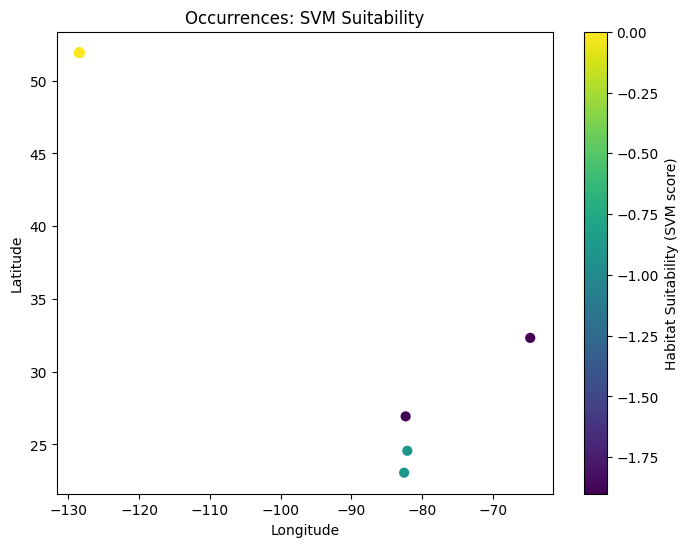

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(df_ml['decimalLongitude'], df_ml['decimalLatitude'], c=df_ml['score'], cmap='viridis', s=40)
plt.colorbar(label='Habitat Suitability (SVM score)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Occurrences: SVM Suitability')
plt.show()


# Yearly anomaly counts

anomaly  -1
year       
2006      1
2007      1
2008      1
2012      1
2015     12
2016     12
2017     12
2018      9


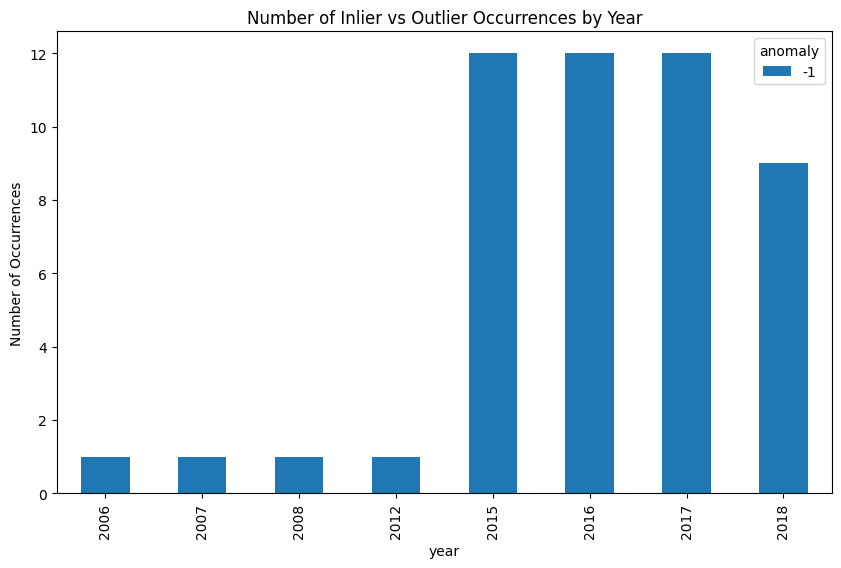

In [30]:
if 'year' not in df_ml:
    df_ml['year'] = pd.to_datetime(df_ml['time']).dt.year

anomaly_by_year = df_ml.groupby('year')['anomaly'].value_counts().unstack().fillna(0)
print(anomaly_by_year)
anomaly_by_year.plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel('Number of Occurrences')
plt.title('Number of Inlier vs Outlier Occurrences by Year')
plt.show()


Plot the SDM Suitability Map

In [31]:
# print('sal_grid shape:', sal_grid.shape)
# print('sal_lats shape:', sal_lats.shape)
# print('sal_lons shape:', sal_lons.shape)
# print('temp_grid shape:', temp_grid.shape)
# print('temp_lats shape:', temp_lats.shape)
# print('temp_lons shape:', temp_lons.shape)


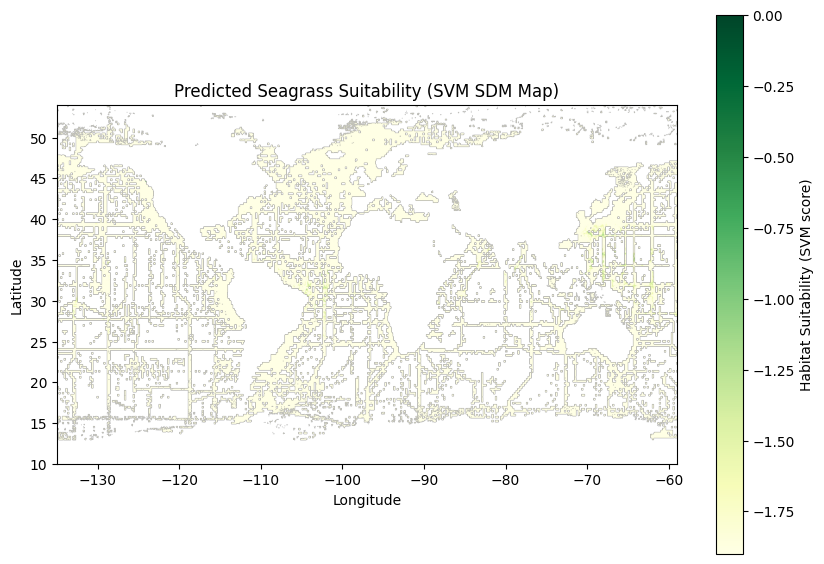

In [32]:
import numpy as np
import rasterio
from rasterio.transform import from_origin
from rasterio.vrt import WarpedVRT
from rasterio.enums import Resampling
from rasterio.windows import Window
import matplotlib.pyplot as plt

# --- config ---------------------------------------------------------------
bbox = AoI_BBOX  # minx, miny, maxx, maxy  (lon/lat)
step = 0.01                          # coarser than 0.005 to start; tune later
tile = 1024                          # tile size (px)
nodata = -9999.0                     # output nodata
dst_crs = "EPSG:4326"


tif_by_var = {
    'i': f'{PROJECT_DIR}/woa23_all_i00_01.nc_i_mn.tif',
    'i_sd': f'{PROJECT_DIR}/woa23_all_i00_01.nc_i_sd.tif',
    'n': f'{PROJECT_DIR}/woa23_all_n00_01.nc_n_mn.tif',
    'n_sd': f'{PROJECT_DIR}/woa23_all_n00_01.nc_n_sd.tif',
    'o': f'{PROJECT_DIR}/woa23_all_o00_01_o_sd.tif',
    'o_sd': f'{PROJECT_DIR}/woa23_all_o00_01_o_mn.tif',
    'O': f'{PROJECT_DIR}/woa23_all_O00_01.nc_A_mn.tif',
    'O_sd': f'{PROJECT_DIR}/woa23_all_O00_01.nc_A_sd.tif',
    'p': f'{PROJECT_DIR}/woa23_all_p00_01.nc_p_mn.tif',
    'p_sd': f'{PROJECT_DIR}/woa23_all_p00_01.nc_p_sd.tif',
    't': f'{PROJECT_DIR}/woa23_decav_t00_04_t_mn.tif',
    't_sd': f'{PROJECT_DIR}/woa23_decav_t00_04_t_sd.tif',
}

# keep only env_vars that you actually have rasters for (and in correct order)
exclude = ['decimalLongitude', 'decimalLatitude', 'eventDate', 'year']
env_vars = [c for c in df.columns if c not in exclude]
env_vars = [v for v in env_vars if v in tif_by_var]

# --- target grid ----------------------------------------------------------
minx, miny, maxx, maxy = bbox
width  = int(np.ceil((maxx - minx) / step))
height = int(np.ceil((maxy - miny) / step))
transform = from_origin(minx, maxy, step, step)

# --- open aligned VRTs (warped to target grid) ---------------------------
# Do this once; they can be read window-by-window later.
vrts = {}
srcs = {}
for name in env_vars:
    src = rasterio.open(tif_by_var[name])
    srcs[name] = src
    vrts[name] = WarpedVRT(
        src,
        dst_crs=dst_crs,
        dst_transform=transform,
        width=width,
        height=height,
        resampling=Resampling.bilinear,
        nodata=nodata,
    )

# --- helper: window generator --------------------------------------------
def windows(w, h, block):
    for r0 in range(0, h, block):
        for c0 in range(0, w, block):
            yield Window(
                col_off=c0,
                row_off=r0,
                width=min(block, w - c0),
                height=min(block, h - r0),
            )

# --- create output GeoTIFF (tiled & compressed) --------------------------
profile = {
    "driver": "GTiff",
    "height": height,
    "width": width,
    "count": 1,
    "dtype": "float32",
    "crs": dst_crs,
    "transform": transform,
    "nodata": nodata,
    "tiled": True,
    "blockxsize": tile,
    "blockysize": tile,
    "compress": "lzw",
}

out_path = "suitability.tif"
with rasterio.open(out_path, "w", **profile) as dst:
    for win in windows(width, height, tile):
        # read each feature tile -> (H, W)
        bands = []
        valid = None
        for name in env_vars:
            arr = vrts[name].read(
                1, window=win, out_dtype="float32", masked=True
            )
            if valid is None:
                valid = ~arr.mask
            else:
                valid &= ~arr.mask
            bands.append(arr.filled(np.nan))

        if not np.any(valid):
            # nothing valid in this tile
            dst.write(
                np.full((win.height, win.width), nodata, dtype="float32"), 1, window=win
            )
            continue

        # stack -> (F, H, W) -> (N, F)
        FHW = np.stack(bands, axis=0)           # (F, H, W)
        X = FHW[:, valid].T                     # (N, F)

        # scale + score only valid pixels
        Xs = scaler.transform(X).astype("float32")
        scores = model.decision_function(Xs).astype("float32")

        # write back into tile buffer
        out = np.full((win.height, win.width), nodata, dtype="float32")
        out[valid] = scores
        dst.write(out, 1, window=win)

# --- cleanup --------------------------------------------------------------
for v in vrts.values():
    v.close()
for s in srcs.values():
    s.close()

# --- quicklook plot (imshow is cheap vs scatter of millions of points) ---
with rasterio.open(out_path) as r:
    arr = r.read(1).astype("float32")
    arr = np.ma.masked_values(arr, nodata)
    extent = (r.bounds.left, r.bounds.right, r.bounds.bottom, r.bounds.top)

plt.figure(figsize=(10, 7))
im = plt.imshow(arr, extent=extent, origin="upper", cmap="YlGn")
plt.colorbar(im, label="Habitat Suitability (SVM score)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Predicted Seagrass Suitability (SVM SDM Map)")
plt.show()


In [33]:
from matplotlib import cm, colors
import folium

m = folium.Map(location=[24.75, -81], zoom_start=9, tiles=None)
folium.TileLayer('Esri.WorldImagery').add_to(m)

norm = colors.Normalize(vmin=grid_df['suitability'].min(), vmax=grid_df['suitability'].max())
cmap = cm.get_cmap('YlGnBu')

for i, row in grid_df.iterrows():
    col = colors.rgb2hex(cmap(norm(row['suitability'])))
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=2,
        color=col,
        fill=True,
        fill_opacity=0.45
    ).add_to(m)

for i, row in df_ml.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=0.9
    ).add_to(m)
m

NameError: name 'grid_df' is not defined

Spatial and environmental plots show which locations and conditions are flagged as outliers, possibly indicating abnormal events (e.g., die-offs, blooms, extreme conditions).

Yearly anomaly plot reveals that certain years (e.g., 2021, 2022, 2023) have higher proportions of anomalies—potentially corresponding to environmental stress events.

Anomaly points can be further investigated against known disturbances (hurricanes, algal blooms, etc.) to provide ecological insight and support management.



Results:

Most points (~86%) are classified as “normal” based on environmental conditions.

A subset of points (23 out of 170) are flagged as anomalies (outliers) by the SVM.

